In [ ]:
import pandas as pd
import numpy as np
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
import pandas as pd

# Assuming your data is stored in a file called 'data.tsv'
df0 = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')
print(df0.shape)
df0.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df0.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.000,11.000,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.000,0.000,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000


In [ ]:
df = df0[["ID","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Kidhome","Teenhome"]]

In [ ]:
pd.set_option('display.max_columns', None)

def data_overview(df, head=5):
    # Display shape of the DataFrame
    print(" SHAPE ".center(125, '-'))
    print('Rows:', df.shape[0])
    print('Columns:', df.shape[1])

    # Display first few rows of the DataFrame
    print(" HEAD ".center(125, '-'))
    print(df.head(head))

    # Display data types of each column
    print(" DATA TYPES ".center(125, '-'))
    print(df.dtypes)

    # Display summary statistics
    print(" SUMMARY STATISTICS ".center(125, '-'))
    print(df.describe(include='all'))

    # Display missing values for each column
    print(" MISSING VALUES ".center(125, '-'))
    print(df.isnull().sum())

    # Display duplicated rows
    print(" DUPLICATED VALUES ".center(125, '-'))
    print(df.duplicated().sum())

    # Display unique values in each column
    print(" UNIQUE VALUES ".center(125, '-'))
    unique_counts = df.nunique()
    print(unique_counts)

    # Display columns with potential errors (e.g., mixed data types)
    print(" POTENTIAL ERRORS ".center(125, '-'))
    for col in df.columns:
        types = df[col].apply(type).value_counts()
        if len(types) > 1:
            print(f"Column '{col}' has mixed types: {types}")

# Example usage with your DataFrame 'data'
data_overview(df)


----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows: 2240
Columns: 14
------------------------------------------------------------ HEAD -----------------------------------------------------------
     ID  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  5524       58       635         88              546              172                88            88                  3                8   
1  2174       38        11          1                6                2                 1             6                  2                1   
2  4141       26       426         49              127              111                21            42                  1                8   
3  6182       26        11          4               20               10                 3             5                  2                2   
4  5324   

In [ ]:

df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.head()

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,1,0,1,1
4,5324,94,173,43,118,46,27,15,5,5,3,6,1,0,1,1


In [ ]:
df["Frequency"] = df[["NumDealsPurchases","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",]].sum(axis=1)
df["Monatery"] = df[["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]].sum(axis=1)
df.head(2)

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27


<Figure size 800x550 with 0 Axes>

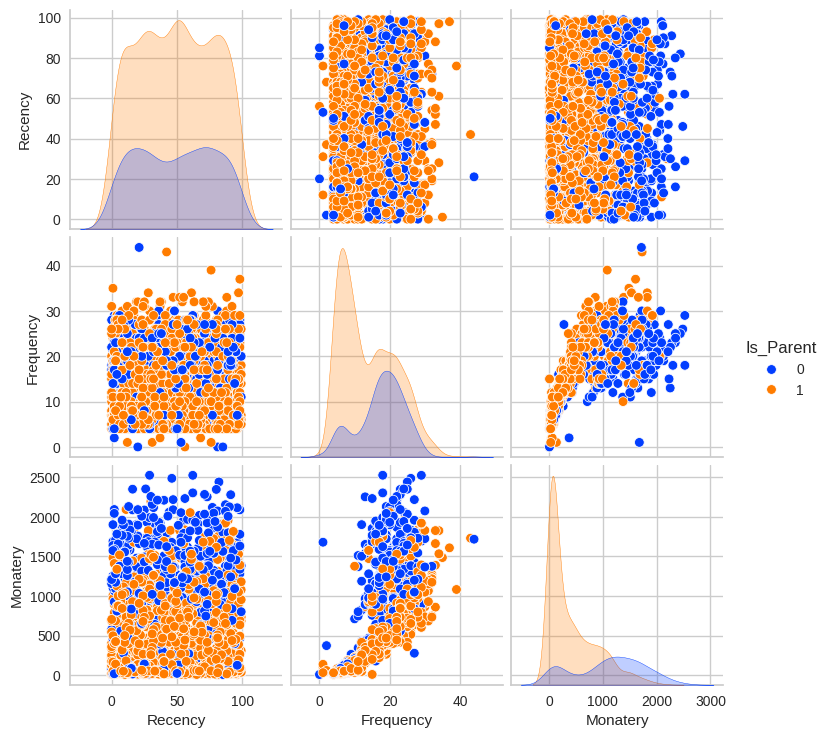

In [ ]:
plt.figure()
sns.pairplot(df[["Recency", "Frequency", "Monatery", "Is_Parent"]], hue="Is_Parent", palette="bright")
plt.show()

In [ ]:
df_MS = df.copy()
df_MS["Marital_Status"] = df0["Marital_Status"]
df_MS.head()

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery,Marital_Status
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617,Single
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27,Single
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,21,776,Together
3,6182,26,11,4,20,10,3,5,2,2,0,4,1,0,1,1,8,53,Together
4,5324,94,173,43,118,46,27,15,5,5,3,6,1,0,1,1,19,422,Married


In [ ]:
df_MS["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

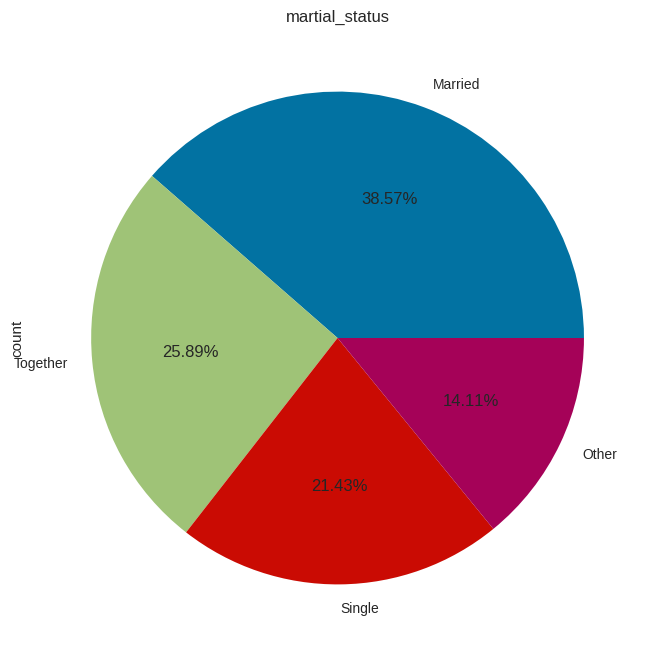

In [ ]:

# Define the categories to keep as separate and merge others into "Other"
keep_categories = ['Married', 'Together', 'Single']
category_counts = df_MS['Marital_Status'].value_counts()
merge_categories = category_counts[~category_counts.index.isin(keep_categories)].index.tolist()

# Create the new column "new_marital_status" with merged categories
df_MS['new_marital_status'] = df_MS['Marital_Status'].apply(lambda x: x if x in keep_categories else 'Other')
new_MS_count = df_MS['new_marital_status'].value_counts()
new_MS_count.plot(kind='pie', autopct='%.2f%%', figsize=(8, 8))
plt.title("martial_status")
plt.show()

In [ ]:
df_MS.head(2)

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery,Marital_Status,new_marital_status
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617,Single,Single
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27,Single,Single


<Figure size 800x550 with 0 Axes>

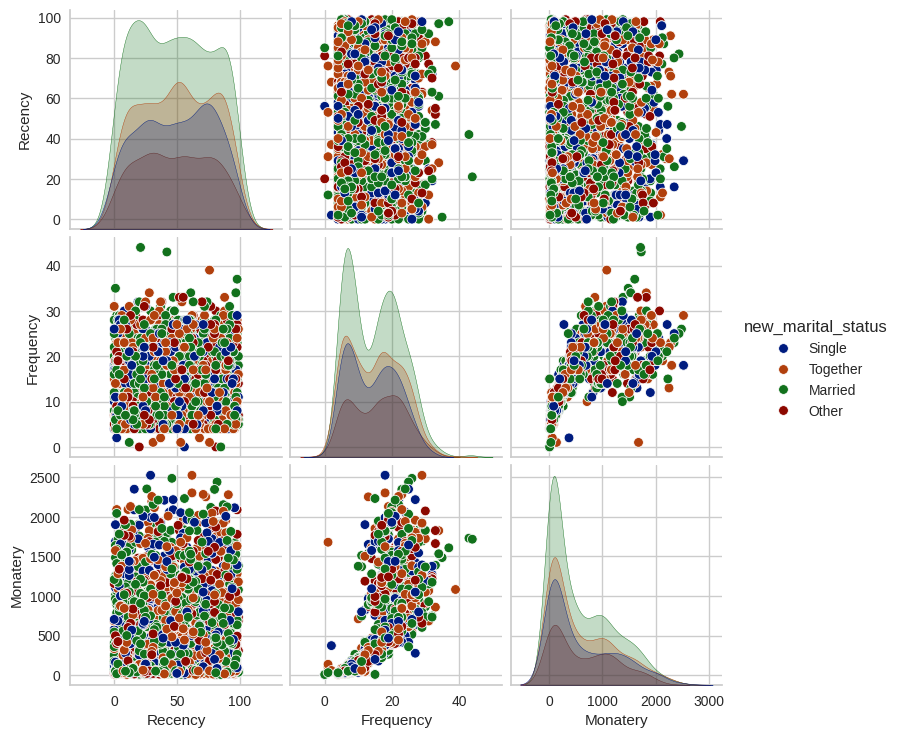

In [ ]:
plt.figure()
sns.pairplot(df_MS[["Recency", "Frequency", "Monatery", "new_marital_status"]], hue="new_marital_status", palette= "dark")
plt.show()

In [ ]:
rfm = df[["Recency","Frequency","Monatery"]]
rfm.head()

,Recency,Frequency,Monatery
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


In [ ]:
#scaling data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled)
#Renaming the columns
rfm_scaled.columns = ["recency","frequency","monatery"]
rfm_scaled.head()

,recency,frequency,monatery
0,0.307,1.321,1.679
1,-0.384,-1.155,-0.961
2,-0.798,0.800,0.283
3,-0.798,-0.894,-0.918
4,1.550,0.539,-0.305


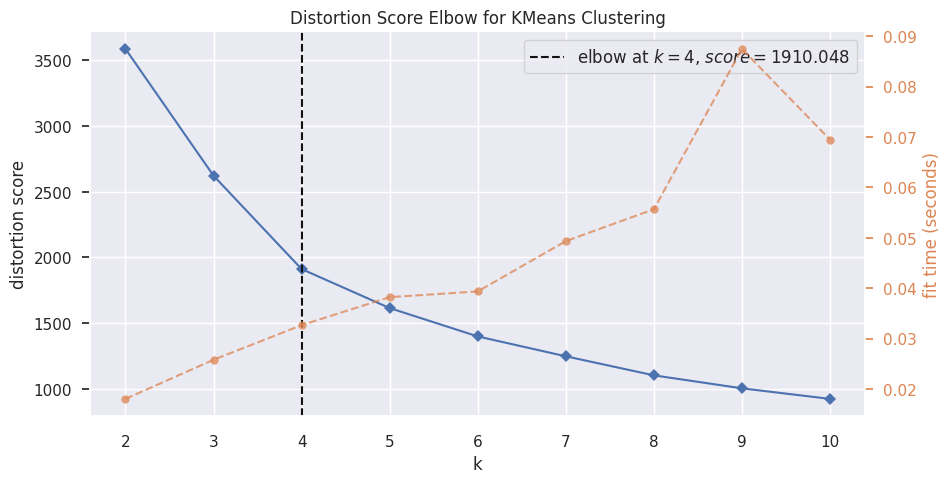

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Random initailazing of k=10 to plot graph and find Elbow
plt.figure(figsize=(10,5))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_scaled)
Elbow_M.show()

In [ ]:
#KMeans Clustering
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
rfm_scaled["clusters"]=kmeans.labels_
rfm["clusters"]=kmeans.labels_
df_MS["clusters"] = kmeans.labels_
df["clusters"] = kmeans.labels_
rfm_scaled.head()

,recency,frequency,monatery,clusters
0,0.307,1.321,1.679,2
1,-0.384,-1.155,-0.961,1
2,-0.798,0.800,0.283,0
3,-0.798,-0.894,-0.918,1
4,1.550,0.539,-0.305,2


In [ ]:
#centriods
kmeans.cluster_centers_

array([[-0.91812381,  0.90764288,  0.84441976],
       [-0.84476001, -0.81555299, -0.79537779],
       [ 0.807027  ,  0.87380046,  0.91671158],
       [ 0.89151275, -0.76756513, -0.77594997]])

<function matplotlib.pyplot.show(close=None, block=None)>

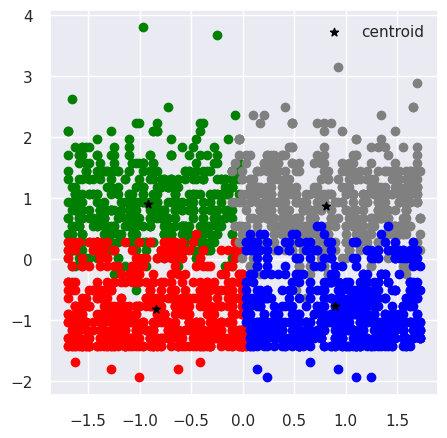

In [ ]:
one = rfm_scaled[rfm_scaled["clusters"]==0]
two = rfm_scaled[rfm_scaled["clusters"]==1]
three = rfm_scaled[rfm_scaled["clusters"]==2]
four = rfm_scaled[rfm_scaled["clusters"]==3]

#Lets check the quality of clustering in the data set
plt.figure(figsize=(5,5))
plt.scatter(one["recency"],one["frequency"],color='green')
plt.scatter(two["recency"],two["frequency"],color='red')
plt.scatter(three["recency"],three["frequency"],color='grey')
plt.scatter(four["recency"],four["frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.legend()
plt.show

Text(0.5, 1.0, 'Recency v/s Clusters')

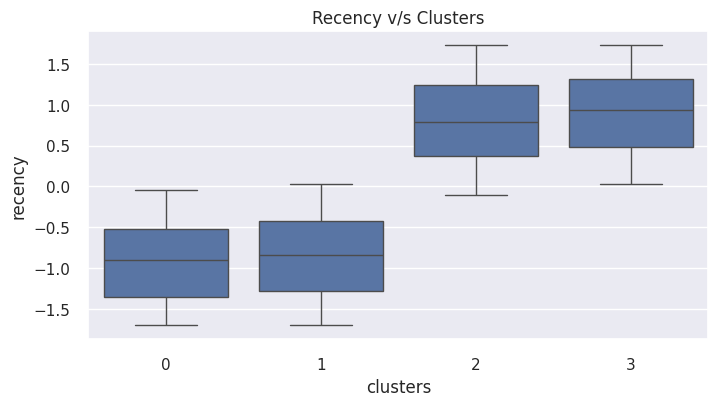

In [ ]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="clusters",y="recency",data=rfm_scaled).set_title("Recency v/s Clusters")

Text(0.5, 1.0, 'Frequency v/s Clusters')

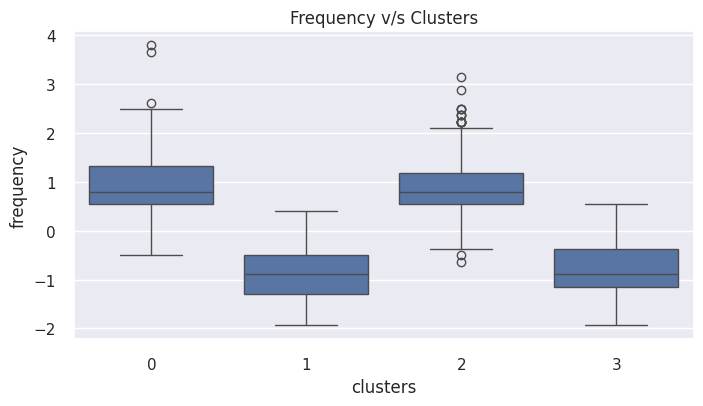

In [ ]:
sns.boxplot(x="clusters",y="frequency",data=rfm_scaled).set_title("Frequency v/s Clusters")

Text(0.5, 1.0, 'Monatery v/s Clusters')

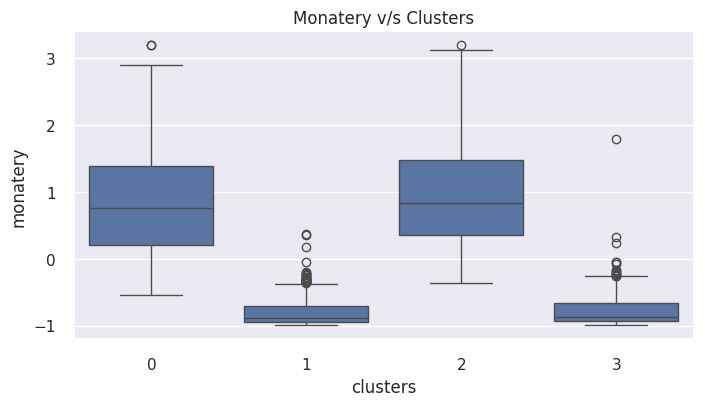

In [ ]:
sns.boxplot(x="clusters",y="monatery",data=rfm_scaled).set_title("Monatery v/s Clusters")

In [ ]:

# Define bins and assign scores for each component
bins1 = np.linspace(rfm["Recency"].min(),rfm["Recency"].max(),6)
rfm["r_score"] = pd.cut(rfm["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(rfm["Frequency"].min(),rfm["Frequency"].max(),6)
rfm["f_score"] = pd.cut(rfm["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(rfm["Monatery"].min(),rfm["Monatery"].max(),6)
rfm["m_score"] = pd.cut(rfm["Monatery"],bins3,labels=[1,2,3,4,5],include_lowest=True)

rfm["RFM SCORE"] = rfm["r_score"].astype(str) + rfm["f_score"].astype(str)
rfm.head()


,Recency,Frequency,Monatery,clusters,r_score,f_score,m_score,RFM SCORE
0,58,25,1617,2,3,3,4,33
1,38,6,27,1,4,1,1,41
2,26,21,776,0,4,3,2,43
3,26,8,53,1,4,1,1,41
4,94,19,422,2,1,3,1,13


In [ ]:
dict_seg = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True)
df['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True)
df.head()

,ID,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kidhome,Teenhome,Children,Is_Parent,Frequency,Monatery,clusters,segment
0,5524,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,25,1617,2,need_attention
1,2174,38,11,1,6,2,1,6,2,1,1,2,1,1,2,1,6,27,1,promising
2,4141,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,21,776,0,potential_loyalists
3,6182,26,11,4,20,10,3,5,2,2,0,4,1,0,1,1,8,53,1,promising
4,5324,94,173,43,118,46,27,15,5,5,3,6,1,0,1,1,19,422,2,at_Risk


In [ ]:
#lets segregate dataframe w.r.t its cluster
c1 = rfm[rfm["clusters"]==0]
c2 =rfm[rfm["clusters"]==1]
c3 = rfm[rfm["clusters"]==2]
c4 = rfm[rfm["clusters"]==3]

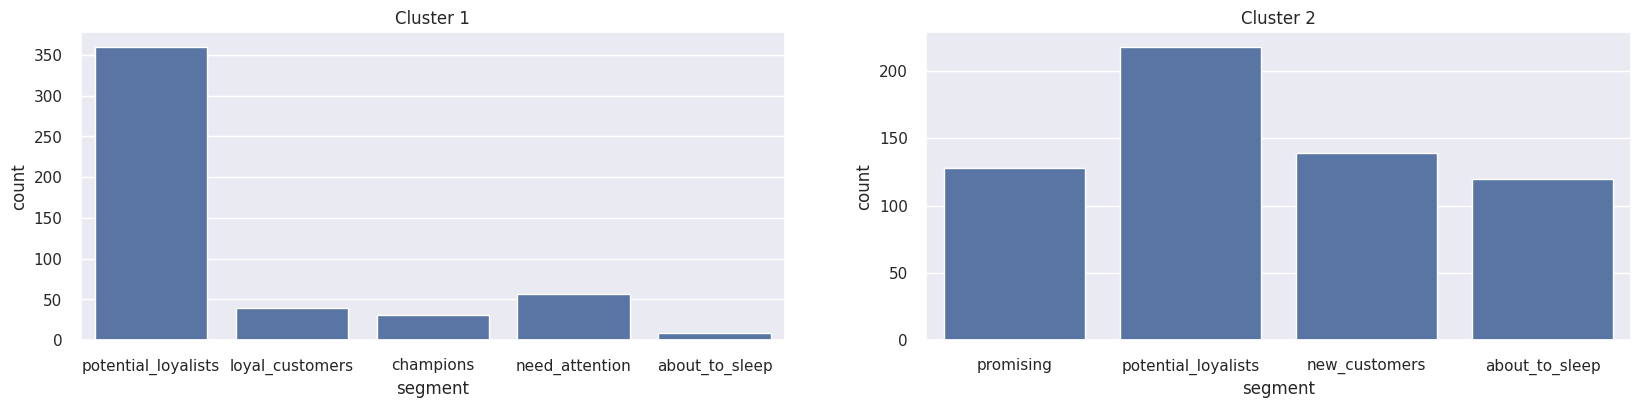

In [ ]:
sns.set(rc={"figure.figsize":(20, 4)})
fig, ax =plt.subplots(1,2)
sns.countplot(x="segment",data=c1,ax=ax[0]).set_title("Cluster 1")
sns.countplot(x="segment",data=c2,ax=ax[1]).set_title("Cluster 2")
fig.show()

In [ ]:
sns.set(rc={"figure.figsize":(20, 4)})
fig, ax =plt.subplots(1,2)
sns.countplot(x="segment",data=c3,ax=ax[0]).set_title("Cluster 3")
sns.countplot(x="segment",data=c4,ax=ax[1]).set_title("Cluster 4")
fig.show()